In [10]:
####### Approach Explanation #######
'''
Answering each question with the code implmentation in each cell 

'''


########Load Libraries#######

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler # using standard scaler as data for most features is normally distributed
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime
import random

%matplotlib inline

######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())

# TASK 1 - Given that K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale.  So, in this first task, normalize all data attributes. [2 points]

# ANS - Have pre processed and normalized the data below



In [11]:

####################################
#          Pre-Process Data        #
####################################

######## Load Data ########

BASE_PATH = './'
os.listdir(BASE_PATH)


df_load_features = pd.read_csv(os.path.join(BASE_PATH, 'cricketers.csv'))
print("\ndata types of dataframe\n",df_load_features.dtypes)



######## Replace invalid character ? ########

df_load_features.replace("?", np.nan, inplace = True)

######## print quality of data ########

print("\n\nHead data \n\n",df_load_features.head(20))
print("\n\nTail data \n\n",df_load_features.tail(20))
print("\n\nDescribe data \n\n",df_load_features.describe())
print("\n\nNull values present:  ",df_load_features.isnull().values.any())
print("\n\nLength of dataframe:",len(df_load_features))

######## Drop duplicate rows whereever found  ########

duplicate_df = df_load_features[df_load_features.duplicated()] 
  
print("\n\nDuplicate Rows :\n\n" , duplicate_df) 
print("\n\ncount of duplicate rows :" , len(duplicate_df))

df_load_features.drop_duplicates(keep=False,inplace=True) 
print("\n\nlength of dataframe after dropping duplicates:",len(df_load_features))


######## Manage missing values and replace by mode to keep the data consistent ########

for column in df_load_features:
    print("\n\nmode of column: {} is {}".format(column,df_load_features[column].value_counts().idxmax()))
    df_load_features[column].replace(np.nan, df_load_features[column].value_counts().idxmax(), inplace = True)
print("\n\nAll misisng values if any replaced by mode")
print("\n\nIs any null value present after replacing the missing values:  ",df_load_features.isnull().values.any())


######## Drop na columns if still present #########

df_load_features = df_load_features.dropna()

######## Data transformation to set the dataframe in the right format #########

df_load_features_raw = df_load_features.copy() # Store non transformed data in another dataframe for future use


###### Dropping Extra columns ######

df_load_features.drop("PLAYER", axis = 1, inplace=True)
df_load_features.drop("matches_played", axis = 1, inplace=True)
df_load_features.drop("innings_batted", axis = 1, inplace=True)
df_load_features.drop("runs_scored", axis = 1, inplace=True)
df_load_features.drop("highest_runs", axis = 1, inplace=True)
df_load_features.drop("balls_faced", axis = 1, inplace=True)
df_load_features.drop("strike_rate", axis = 1, inplace=True)
df_load_features.drop("innings_bowled", axis = 1, inplace=True)
df_load_features.drop("overs", axis = 1, inplace=True)
df_load_features.drop("runs_given", axis = 1, inplace=True)
df_load_features.drop("wickets_obtained", axis = 1, inplace=True)
df_load_features.drop("average_runs_per_wicket", axis = 1, inplace=True)

print("\n\nHead data post dropping\n\n",df_load_features.head(5))
print("\ndata types of dataframe post droppinge\n",df_load_features.dtypes)

##### Normalize and Standardize values #####

scaler = StandardScaler()
df_load_features[["average_runs","bowling_economy"]]  = scaler.fit_transform(df_load_features[["average_runs","bowling_economy"]])

print("\n\nHead data post scaling\n\n",df_load_features.head(5))





data types of dataframe
 PLAYER                      object
matches_played               int64
innings_batted               int64
runs_scored                  int64
highest_runs                 int64
balls_faced                  int64
average_runs               float64
strike_rate                float64
innings_bowled               int64
overs                      float64
runs_given                   int64
wickets_obtained             int64
average_runs_per_wicket    float64
bowling_economy            float64
dtype: object


Head data 

                  PLAYER  matches_played  innings_batted  runs_scored  \
0           Aaron Finch              10               9          134   
1        AB de Villiers              12              11          480   
2       Abhishek Sharma               3               3           63   
3        Ajinkya Rahane              15              14          370   
4            Alex Hales               6               6          148   
5         Ambati Rayudu

108            10.04  


Describe data 

        matches_played  innings_batted  runs_scored  highest_runs  balls_faced  \
count      109.000000      109.000000   109.000000    109.000000   109.000000   
mean         9.559633        7.889908   173.633028     43.495413   124.669725   
std          5.161164        4.982078   182.356522     29.830268   123.670265   
min          0.000000        0.000000     0.000000      0.000000     0.000000   
25%          5.000000        4.000000    36.000000     20.000000    33.000000   
50%         10.000000        7.000000    99.000000     40.000000    76.000000   
75%         14.000000       13.000000   260.000000     62.000000   188.000000   
max         17.000000       17.000000   735.000000    128.000000   516.000000   

       average_runs  strike_rate  innings_bowled       overs  runs_given  \
count    109.000000   109.000000      109.000000  109.000000   109.00000   
mean      22.360092   122.258716        4.513761   13.894495   119.93578   


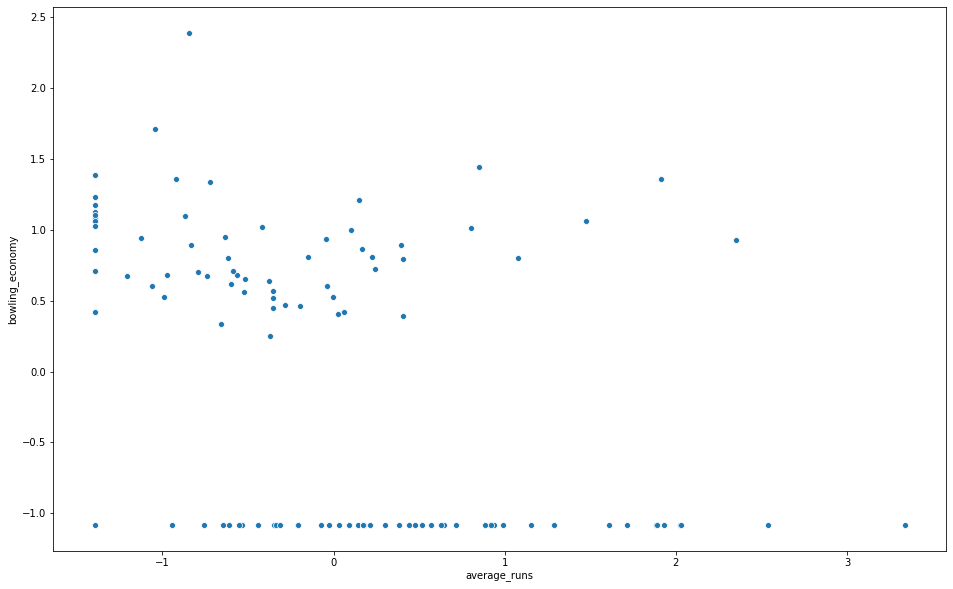

In [12]:
##############################################################
#    Creating scatter plots for rudimentary view of data     #
##############################################################

numerical_variables = ["average_runs","bowling_economy"]


##### Drawing scatter plots for numerical variables against each other #####        
for numvar in range(len(numerical_variables)):
    for numvarinner in range(numvar+1,len(numerical_variables)):
        plt.figure(figsize=(16, 10))
        snplot = sn.scatterplot(data=df_load_features,x=numerical_variables[numvar],y=numerical_variables[numvarinner])
        #snplot.get_figure().savefig('scatterplots\ScatterPlotNumericalVariables_{}_{}.pdf'.format(numerical_variables[numvar],numerical_variables[numvarinner]))
        plt.show()
        


# EDA Analysis as below from the above plot 

We can clearly see two clusters from the rudimentary view , now lets run the algorithm below

# TASK 2 -  Write your own code for K-means algorithm using two attributes namely average_runs and bowling_economy. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes namely average_runs and bowling_economy, respectively. Color data points belonging to the first cluster with red and the second cluster with blue. Copy the plot diagram in the word document and interpret the output. [3 points]

# ANS - Own code below with plot & clusters drawn for K=2

In [13]:
##############################################################
#                   Coding K Means Algorithm                 #
##############################################################

# Calculate Distance
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

# Calculate the closest centroid to every point
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid # return the index of the centroid chosen for each row of data

# Calculate new centroids 
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# Kmeans Function
def KMeans(K , df1, max_iter):
    
    init_centroids = random.sample(range(0, len(df1)), K) # calculate centroids based on random K indexes
    centroids = []
    get_centroids = []
    for i in init_centroids:
        centroids.append(df1.loc[i])
    centroids = np.array(centroids)
    print("ALL CHANGING CENTROIDS BELOW:")
    print('random centroids',centroids) # random centroids selected for the algorithm
    X = np.array(df1)
    get_centroids = findClosestCentroids(centroids, X)  #get_centroids
    new_df = pd.concat([df1, pd.DataFrame(get_centroids, columns=['cluster'])],
                      axis=1)
    
    for i in range(max_iter):
        #colorhue = {'color': ['r', 'b']}
        #fg = sn.FacetGrid(data=new_df, hue_kws=colorhue,hue='cluster', aspect=1.61)
        #fg.map(plt.scatter, 'average_runs', 'bowling_economy').add_legend()
        '''
        plt.figure()
        plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
        plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
        plt.show()
        '''
        ######## Calculate new Centroids #########
        get_centroids = findClosestCentroids(centroids, X)  #get_centroids
        centroids = calc_centroids(get_centroids, X)
        centroids = np.array(centroids)
        print('new centroid',centroids)
        new_df = pd.concat([df1, pd.DataFrame(get_centroids, columns=['cluster'])],
                      axis=1)
        
    ########### Plot final Cluster based on last centroid ############
    print("FINAL PLOT OF CLUSTERS BELOW")
    #colorhue = {'color': ['r', 'b']}
    fg = sn.FacetGrid(data=new_df,palette='Set1',hue='cluster', aspect=1.61)
    fg.map(plt.scatter, 'average_runs', 'bowling_economy').add_legend()
    '''
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()
    '''
        

   
    
         


ALL CHANGING CENTROIDS BELOW:
random centroids [[ 0.14918782  1.21018573]
 [-0.33459878 -1.08383228]]
new centroid [[-0.40151534  0.85285163]
 [ 0.51025908 -1.08383228]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [[-0.44736787  0.8516665 ]
 [ 0.5477974  -1.04285693]]
new centroid [

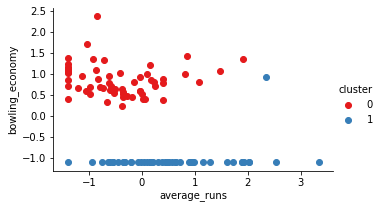

In [14]:
##############################################################
#                   K Means run with K=2                     #
##############################################################

KMeans(2,df_load_features, 20)


# TASK 3 - Redo question-2 on different values of K = 2,3,4,5. For each case, draw the plot of clusters as stated above. Visualize these plots, copy the plot diagrams in the word document,  and comment on which is better clustering (and reasons) based on visualization only. [3 points]

# ANS - All clusters and plots drawn below for K=3,4,5

ALL CHANGING CENTROIDS BELOW:
random centroids [[ 0.91887669 -1.08383228]
 [-0.63111315  0.94711027]
 [-0.91763966  1.35750799]]
new centroid [[ 0.58828918 -1.04200328]
 [-0.22083768  0.67671445]
 [-1.20528981  1.25915284]]
new centroid [[ 0.51025908 -1.08383228]
 [ 0.0371446   0.73405962]
 [-1.17913979  1.06343746]]
new centroid [[ 0.51025908 -1.08383228]
 [ 0.12081162  0.72871254]
 [-1.10464779  1.01996194]]
new centroid [[ 0.51025908 -1.08383228]
 [ 0.21404845  0.74717292]
 [-1.03759793  0.96205296]]
new centroid [[ 0.51025908 -1.08383228]
 [ 0.28901775  0.74754874]
 [-0.98742221  0.94219953]]
new centroid [[ 0.51025908 -1.08383228]
 [ 0.28901775  0.74754874]
 [-0.98742221  0.94219953]]
new centroid [[ 0.51025908 -1.08383228]
 [ 0.28901775  0.74754874]
 [-0.98742221  0.94219953]]
new centroid [[ 0.51025908 -1.08383228]
 [ 0.28901775  0.74754874]
 [-0.98742221  0.94219953]]
new centroid [[ 0.51025908 -1.08383228]
 [ 0.28901775  0.74754874]
 [-0.98742221  0.94219953]]
new centroid [[ 

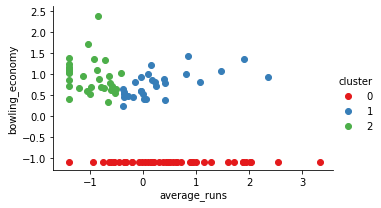

In [15]:
##############################################################
#                   K Means run with K=3                     #
##############################################################

KMeans(3,df_load_features, 20)

ALL CHANGING CENTROIDS BELOW:
random centroids [[-0.71975533  1.33646195]
 [-0.03808441  0.59985067]
 [-0.02684808 -1.08383228]
 [ 0.80464063  1.01235299]]
new centroid [[-1.07922554  1.01999192]
 [-0.17808241  0.62300131]
 [ 0.45009843 -1.08383228]
 [ 1.40162288  0.8002557 ]]
new centroid [[-1.12421341  1.02876889]
 [-0.16199621  0.65674512]
 [ 0.45009843 -1.08383228]
 [ 1.6872279   0.78836302]]
new centroid [[-1.12421341  1.02876889]
 [-0.16199621  0.65674512]
 [ 0.40473299 -1.08383228]
 [ 1.79343801  0.55433861]]
new centroid [[-1.12421341  1.02876889]
 [-0.10011834  0.69238746]
 [ 0.40473299 -1.08383228]
 [ 2.11523412  0.33011063]]
new centroid [[-1.12421341  1.02876889]
 [-0.10011834  0.69238746]
 [ 0.21604248 -1.08383228]
 [ 2.04103459 -0.31259069]]
new centroid [[-1.12421341  1.02876889]
 [-0.06439711  0.6957058 ]
 [ 0.141873   -1.08383228]
 [ 2.05811609 -0.53400457]]
new centroid [[-1.10464779e+00  1.01996194e+00]
 [-1.02721188e-03  7.03741556e-01]
 [ 1.11700516e-01 -1.08383228

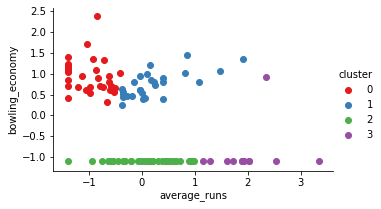

In [16]:
##############################################################
#                   K Means run with K=4                     #
##############################################################

KMeans(4,df_load_features, 20)

ALL CHANGING CENTROIDS BELOW:
random centroids [[-0.00312693  0.52618954]
 [ 0.06366683  0.41675014]
 [ 0.51436867 -1.08383228]
 [-0.94323353 -1.08383228]
 [-0.71975533  1.33646195]]
new centroid [[-0.09882073  0.70835468]
 [ 1.04497332  0.76551304]
 [ 0.84810128 -1.08383228]
 [-0.62611922 -1.08383228]
 [-1.07922554  1.01999192]]
new centroid [[-0.1463579   0.6518126 ]
 [ 1.41213093  1.10039557]
 [ 1.02499762 -1.08383228]
 [-0.42838178 -1.08383228]
 [-1.10464779  1.01996194]]
new centroid [[-0.16199621  0.65674512]
 [ 1.41213093  1.10039557]
 [ 1.2289995  -1.08383228]
 [-0.2709805  -1.08383228]
 [-1.12421341  1.02876889]]
new centroid [[-0.16199621  0.65674512]
 [ 1.41213093  1.10039557]
 [ 1.38693836 -1.08383228]
 [-0.17160258 -1.08383228]
 [-1.12421341  1.02876889]]
new centroid [[-0.16199621  0.65674512]
 [ 1.41213093  1.10039557]
 [ 1.47583087 -1.08383228]
 [-0.12235692 -1.08383228]
 [-1.12421341  1.02876889]]
new centroid [[-0.16199621  0.65674512]
 [ 1.41213093  1.10039557]
 [ 1.

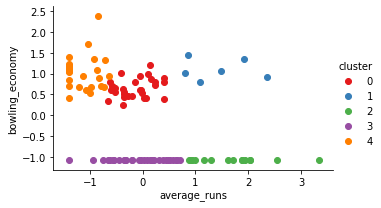

In [17]:
##############################################################
#                   K Means run with K=5                     #
##############################################################

KMeans(5,df_load_features, 20)

In [18]:
#############################################################################################
#                                    Overall Run time                                       #
#############################################################################################

endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Sun, 02 May 2021 05:08:09 +0000
Run ended at :  Sun, 02 May 2021 05:08:17 +0000
